
# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
# import various functions to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 
from sklearn import metrics


# 2. Read Data

In [2]:
mob_data = pd.read_csv('Mobile_data.csv')

# print the first five rows of the data
mob_data.tail()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0
1999,510,2.0,5,45,0.9,168,6,16,483,754,3919,19,4,2,3


In [3]:
mob_data.shape

(2000, 15)


# 3. Data Analysis

### Data Type

In [4]:
mob_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
battery_power    2000 non-null int64
clock_speed      2000 non-null float64
fc               2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [5]:
# splitting features and the target variable
# consider all the columns except 'RGD' using 'iloc'
df_features = mob_data.iloc[:, mob_data.columns != 'price_range']

# consider the target variable
df_target = mob_data.iloc[:, mob_data.columns == 'price_range']

##  Missing Value

In [6]:
mob_data.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

###  Summary Statistics

In [7]:
df_features.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


### Distribution of Variables

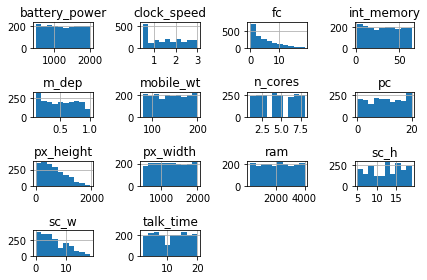

In [8]:
# plot the histogram of numeric independent variables
# the hist() function considers the numeric variables only, by default
df_features.hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

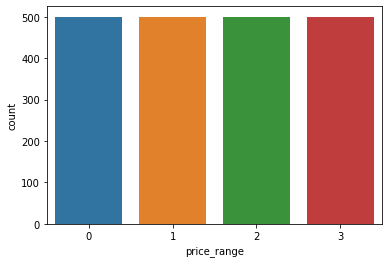

In [9]:
ax = sns.countplot(mob_data['price_range'],label="Count")      
#L, M,H,VH = mob_data['price_range'].value_counts()

###  Discover Outliers 

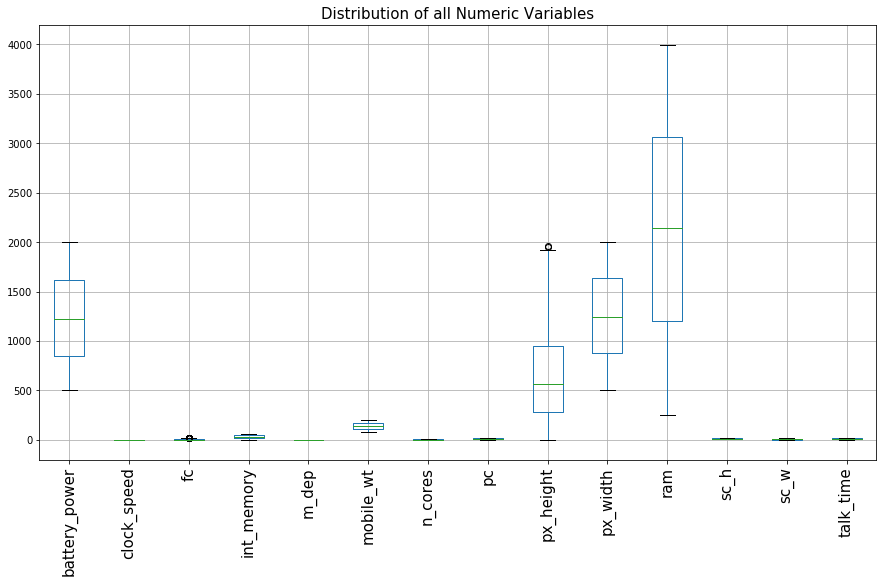

In [10]:
plt.rcParams['figure.figsize'] = [15,8]

df_features.boxplot()
plt.title('Distribution of all Numeric Variables', fontsize = 15)

plt.xticks(rotation = 'vertical', fontsize = 15)

plt.show()

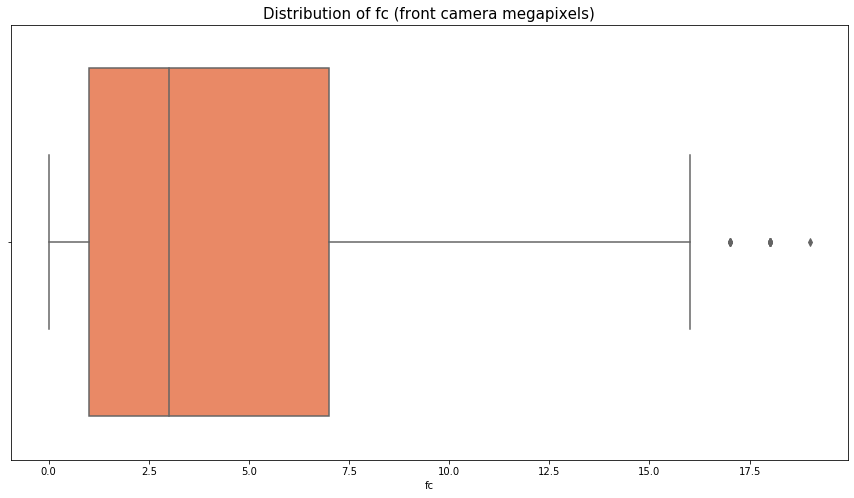

In [11]:
sns.boxplot(df_features['fc'], color='coral')
plt.title('Distribution of fc (front camera megapixels)', fontsize = 15)

plt.show()

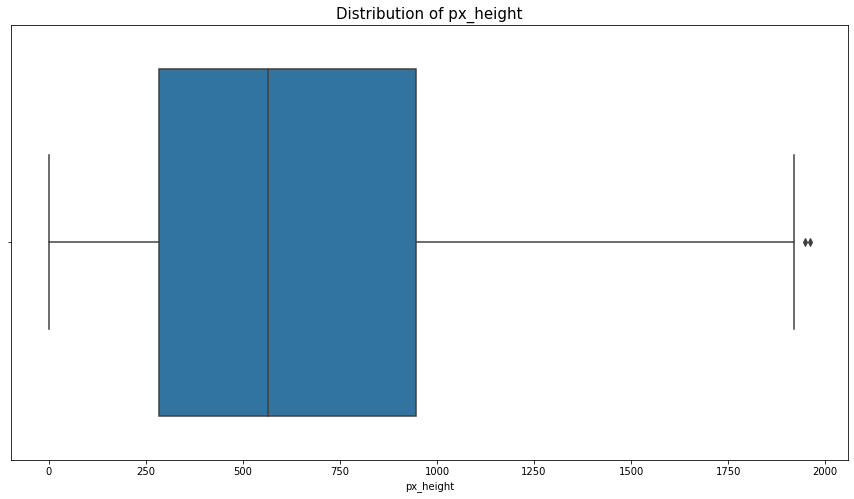

In [12]:
sns.boxplot(df_features['px_height'])

plt.title('Distribution of px_height', fontsize = 15)

plt.show()

##  Remove outliers by IQR method

In [13]:
Q1 = mob_data.quantile(0.25)
Q3 = mob_data.quantile(0.75)

# Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

battery_power     763.50
clock_speed         1.50
fc                  6.00
int_memory         32.00
m_dep               0.60
mobile_wt          61.00
n_cores             4.00
pc                 10.00
px_height         664.50
px_width          758.25
ram              1857.00
sc_h                7.00
sc_w                7.00
talk_time          10.00
price_range         1.50
dtype: float64


In [14]:
mob_data.shape

(2000, 15)

In [15]:
mob_data = mob_data[~((mob_data < (Q1 - 1.5 * IQR)) | (mob_data > (Q3 + 1.5 * IQR))).any(axis=1)]

mob_data = mob_data.reset_index(drop = True)

In [16]:
mob_data.shape

(1980, 15)

In [17]:
print(mob_data[~((mob_data < (Q1 - 1.5 * IQR)) | (mob_data > (Q3 + 1.5 * IQR))).any(axis=1)])

      battery_power  clock_speed  fc  int_memory  m_dep  mobile_wt  n_cores  \
0               842          2.2   1           7    0.6        188        2   
1              1021          0.5   0          53    0.7        136        3   
2               563          0.5   2          41    0.9        145        5   
3               615          2.5   0          10    0.8        131        6   
4              1821          1.2  13          44    0.6        141        2   
5              1859          0.5   3          22    0.7        164        1   
6              1821          1.7   4          10    0.8        139        8   
7              1954          0.5   0          24    0.8        187        4   
8              1445          0.5   0          53    0.7        174        7   
9               509          0.6   2           9    0.1         93        5   
10              769          2.9   0           9    0.1        182        5   
11             1520          2.2   5          33    

 ## Plot the boxplot to recheck for outliers

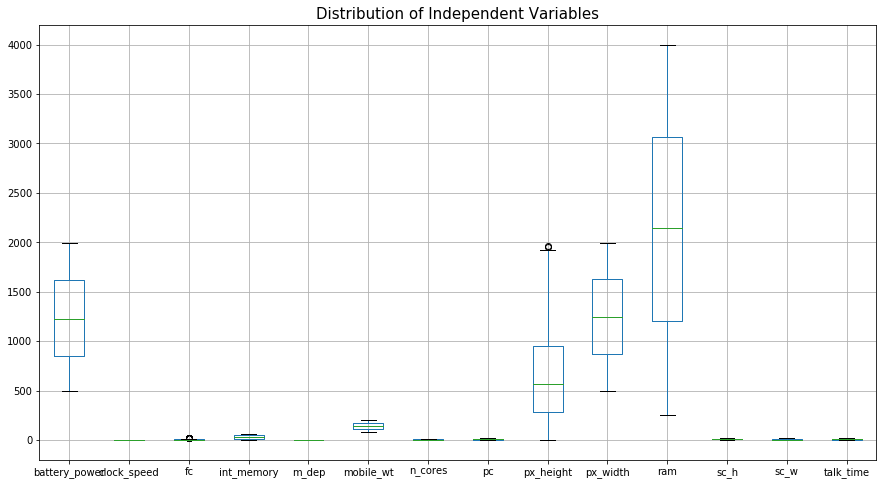

In [18]:
df_features.boxplot()

plt.title('Distribution of Independent Variables', fontsize = 15)

plt.show()

###  Correlation

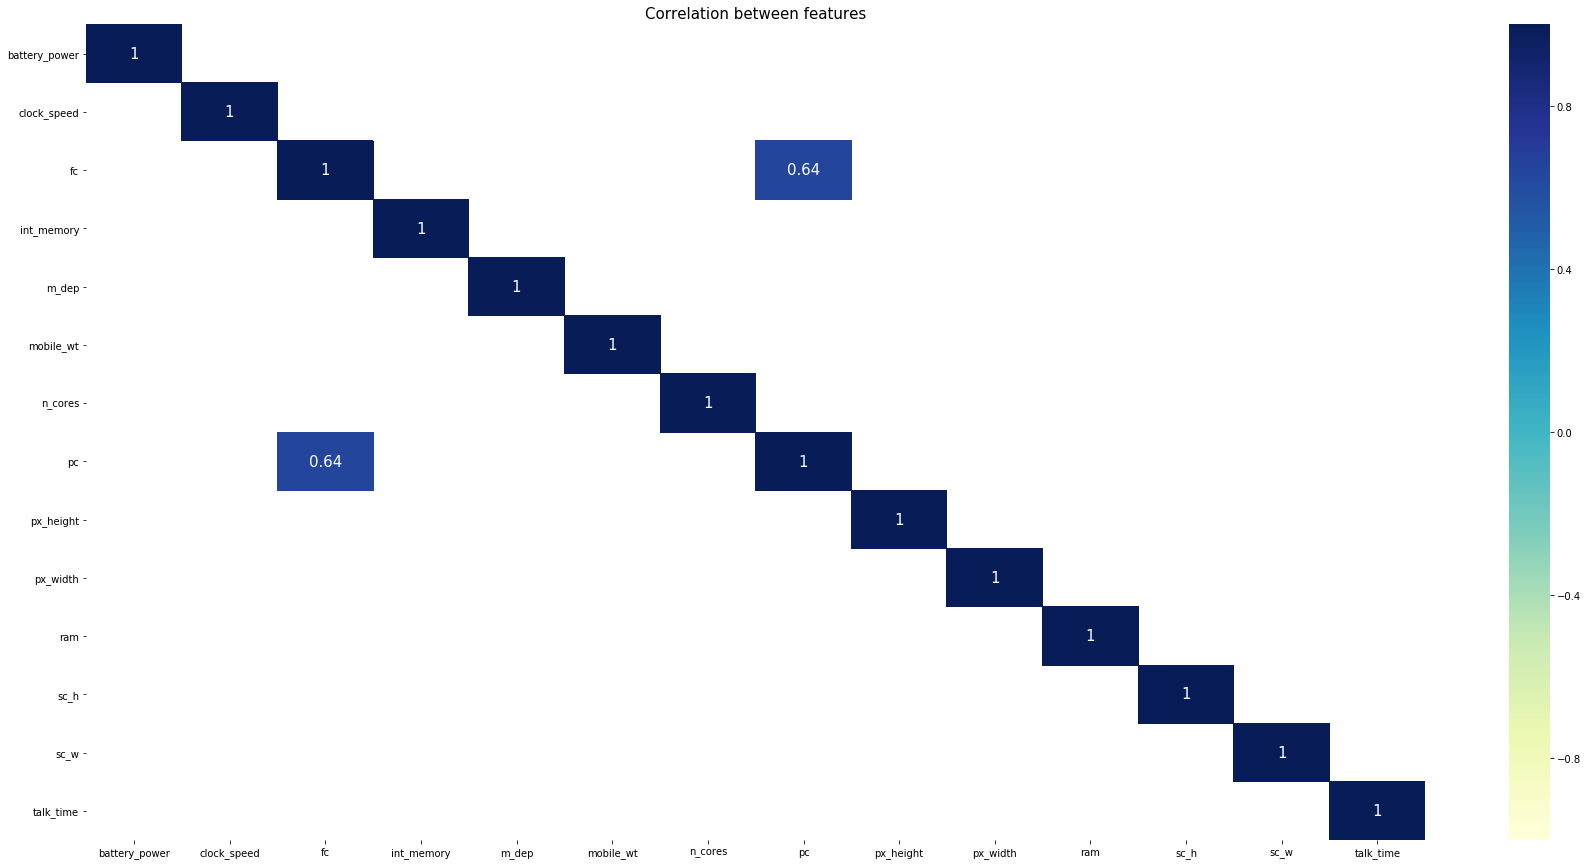

In [19]:
corr = df_features.corr()

plt.figure(figsize=(30, 15))

sns.heatmap(corr[(corr >= 0.6) | (corr <= -0.6)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 15})

plt.title('Correlation between features', fontsize=15)

plt.show()

#### Create a generalized function to calculate the performance metrics for the test set.

In [20]:
# create a generalized function to calculate the performance metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

In [21]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    
    # predict the target values using X_test
    y_pred = model.predict(X_test)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1', 'Predicted:2','Predicted:3'],\
                               index = ['Actual:0','Actual:1', 'Actual:2','Actual:3'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':15})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 8)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 8)

    # display the plot
    plt.show()

# 4. KNN with n=3

In [22]:
y = mob_data.price_range

# drop the target variable from the dataframe
x = mob_data.drop('price_range', axis = 1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=10)

In [24]:
# print dimension of train set
print("X_train",X_train.shape)
print("y_train",y_train.shape)

# print dimension of test set
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (1386, 14)
y_train (1386,)
X_test (594, 14)
y_test (594,)


In [25]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)

knn_model1 = knn_classification.fit(X_train, y_train)

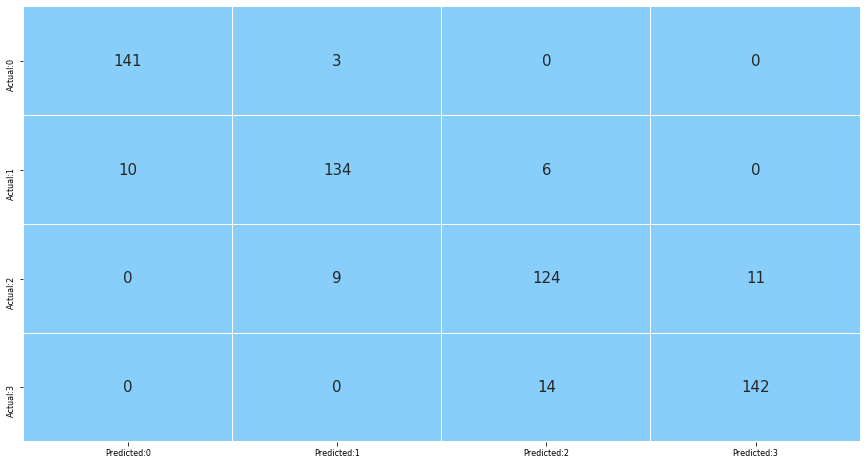

In [26]:
plot_confusion_matrix(knn_model1)

In [27]:
test_report = get_test_report(knn_model1)
print(test_report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       144
           1       0.92      0.89      0.91       150
           2       0.86      0.86      0.86       144
           3       0.93      0.91      0.92       156

    accuracy                           0.91       594
   macro avg       0.91      0.91      0.91       594
weighted avg       0.91      0.91      0.91       594



# 4. KNN with k_range = 1 to 25

In [28]:
k_range = range(1, 26)
scores = []
for n in k_range:
    knn=KNeighborsClassifier(n_neighbors=n)
    knn_model=knn.fit(X_train, y_train)
    result = knn_model.score(X_test, y_test)
    y_pred = knn_model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    scores.append(accuracy)
    #print('KNN score for n = {}  is {} and accuracy is {}'.format(n,round(result,2),round(accuracy,2)))

Text(0, 0.5, 'Testing Accuracy')

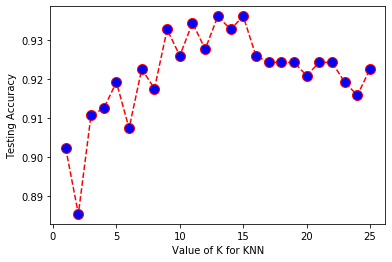

In [29]:
# allow plots to appear within the notebook
%matplotlib inline
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

# <font color='red'>5 KNN with Feature Scaling</font>

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc= sc.fit_transform(X_train)
X_test_sc= sc.transform(X_test)

In [31]:
#X_train_sc

In [32]:
scores2 = []
for n in k_range:
    knn_scale=KNeighborsClassifier(n_neighbors=n)
    knn_scale.fit(X_train_sc, y_train)
    result2 = knn_scale.score(X_test_sc, y_test)
    y_pred2 = knn_scale.predict(X_test_sc)
    accuracy2 = metrics.accuracy_score(y_test, y_pred2)
    scores2.append(accuracy2)
    #print('KNN score for n = {}  is {} and accuracy is {}'.format(n,round(result2,2),round(accuracy2,2)))


Text(0, 0.5, 'Testing Accuracy')

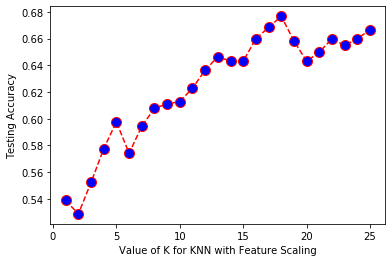

In [33]:
# allow plots to appear within the notebook
%matplotlib inline
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores2,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.xlabel('Value of K for KNN with Feature Scaling')
plt.ylabel('Testing Accuracy')

# <font color='red'>6 Optimal Value of K (using GridSearchCV)</font>

In [34]:
knn = KNeighborsClassifier()

parameters = {'n_neighbors':[4,5,6,7],
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree'],
              'weights':['uniform','distance'],
              'metric':['euclidean'],
              'n_jobs':[-1]}

#Fit the modelX_train, X_test, y_train, y_test 
knn_grid = GridSearchCV(knn, param_grid=parameters)
knn_grid.fit(X_train,y_train)

#predictions on test data
y_predict3=knn_grid.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [35]:
print (knn_grid.best_score_)
print (knn_grid.best_params_)
print (knn_grid.best_estimator_)

0.9235209235209235
{'algorithm': 'auto', 'leaf_size': 1, 'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 7, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
                     weights='distance')


In [36]:
print('Classification Report for test set: \n', get_test_report(knn_grid))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.96       144
           1       0.95      0.90      0.92       150
           2       0.90      0.90      0.90       144
           3       0.94      0.92      0.93       156

    accuracy                           0.93       594
   macro avg       0.93      0.93      0.93       594
weighted avg       0.93      0.93      0.93       594



# Conclusion

1 Accuracy of KNN algorithm when n=3 is 91%

2 Accuracu is very low when Feature scaling is done

3 Accuracy of KNN algorithm with GridSearch is 93%